## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, how = 'left', on =[ 'Mouse ID', 'Mouse ID'])

# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Checking the number of mice.
complete_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df= complete_df.set_index('Mouse ID')

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = index_df.drop(['g989'])

In [41]:
# Checking the number of mice in the clean DataFrame.
cleaned_df.index.value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [45]:
# Resetting "Mouse ID" back to a column
cleaned_df_v2 = cleaned_df.reset_index()

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumorvolume = cleaned_df_v2.groupby(['Drug Regimen'])
tumor_mean = tumorvolume['Tumor Volume (mm3)'].mean()
tumor_med = tumorvolume['Tumor Volume (mm3)'].median()
tumor_var = tumorvolume['Tumor Volume (mm3)'].var()
tumor_std = tumorvolume['Tumor Volume (mm3)'].std()
tumor_sem = tumorvolume['Tumor Volume (mm3)'].sem()

tumorvolume_df = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_med,
    "Variance": tumor_var,
    "Standard Deviation": tumor_std,
    "SEM": tumor_sem
})

tumorvolume_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumorvolume_df2 = cleaned_df_v2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
tumorvolume_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

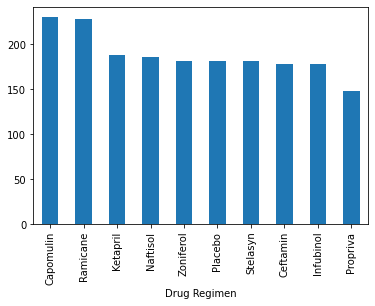

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint= cleaned_df_v2.groupby(['Drug Regimen'])['Timepoint'].count() # Groupby counting each drug regimen
timepoint.sort_values(ascending=False).plot.bar() # Plot bar chart and sort values in descending order
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

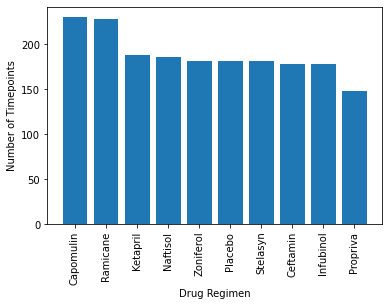

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_desc = timepoint.sort_values(ascending=False) # sorting
plt.bar(timepoint_desc.index, timepoint_desc.values) # pyplot function
plt.ylabel('Number of Timepoints') # Assign y label
plt.xlabel('Drug Regimen') # Assign x label
plt.xticks(rotation='vertical') # Rotate x values
plt.show

<AxesSubplot:ylabel='Sex'>

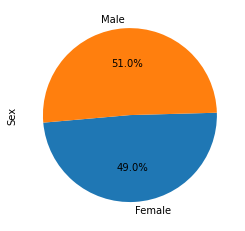

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pie = cleaned_df_v2.groupby(['Sex'])['Sex'].count() # Group by sex and count
sex_pie.plot.pie(autopct='%1.1f%%', startangle=185) # Plot chart with largest value on top and percentages inside slices


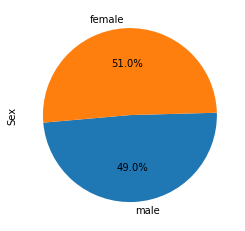

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_pie, labels = ('male', 'female'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df_v2.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(cleaned_df_v2, last_timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_ceft = []
tumor_infu = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
        if row['Drug Regimen']  ==  treatment[0]:
            tumor_cap.append(row['Tumor Volume (mm3)'])
        if row['Drug Regimen']  ==  treatment[1]:
            tumor_ram.append(row['Tumor Volume (mm3)'])
        if row['Drug Regimen']  ==  treatment[2]:
            tumor_ceft.append(row['Tumor Volume (mm3)'])
        if row['Drug Regimen']  ==  treatment[3]:
            tumor_infu.append(row['Tumor Volume (mm3)'])
    # add subset 
treatment_df = pd.DataFrame({
           treatment[0]: tumor_cap,
           treatment[1]: tumor_ram,
           treatment[2]: tumor_ceft,
           treatment[3]: tumor_infu,
})
    
    # Determine outliers using upper and lower bounds
quart_cap = treatment_df[treatment[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = treatment_df[treatment[0]].max()
min_cap = treatment_df[treatment[0]].min()

quart_ram = treatment_df[treatment[1]].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = treatment_df[treatment[1]].max()
min_ram = treatment_df[treatment[1]].min()

quart_ceft = treatment_df[treatment[2]].quantile([.25, .5, .75])
low_ceft = quart_ceft[.25]
med_ceft = quart_ceft[.5]
up_ceft = quart_ceft[.75]
iqr_ceft = up_ceft-low_ceft
lowb_ceft = low_ceft - (1.5*iqr_ceft)
upb_ceft = up_ceft + (1.5*iqr_ceft)
max_ceft = treatment_df[treatment[2]].max()
min_ceft = treatment_df[treatment[2]].min()

quart_infu = treatment_df[treatment[3]].quantile([.25, .5, .75])
low_infu = quart_infu[.25]
med_infu = quart_infu[.5]
up_infu = quart_infu[.75]
iqr_infu = up_infu-low_infu
lowb_infu = low_infu - (1.5*iqr_infu)
upb_infu = up_infu + (1.5*iqr_infu)
max_infu = treatment_df[treatment[3]].max()
min_infu = treatment_df[treatment[3]].min()

outliers = pd.DataFrame({
        'Treatment': treatment,
        'Lower Quartile':[low_cap, low_ram, low_ceft, low_infu],
        'Upper Quartile':[up_cap, up_ram, up_ceft, up_infu],
        'IQR':[iqr_cap, iqr_ram, iqr_ceft, iqr_infu],
        'Median':[med_cap, med_ram, med_ceft, med_infu],
        'Upper Bound': [upb_cap, upb_ram, upb_ceft, upb_infu],
        'Lower Bound': [lowb_cap, lowb_ram, lowb_ceft, lowb_infu],
        'Max': [max_cap, max_ram, max_ceft, max_infu],
        'Min': [min_cap, min_ram, min_ceft, min_infu]
})
outliers_group = outliers.groupby(['Treatment'])
outliers_group.sum()


,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Treatment,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


In [100]:
print(f"'Infubinol' contains an outlier, it contains a mouse with a tumor size of {min_infu}.")

'Infubinol' contains an outlier, it contains a mouse with a tumor size of 36.3213458.


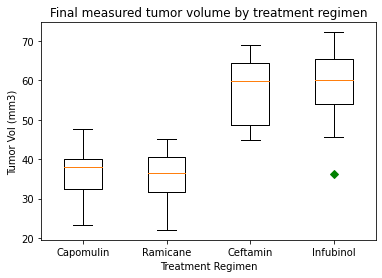

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# list to be used for boxplot containing list of drug tumor data
box_list = [
    treatment_df[treatment[0]],
    treatment_df[treatment[1]],
    treatment_df[treatment[2]],
    treatment_df[treatment[3]]
]
ax = plt.subplot()
ax.set_title('Final measured tumor volume by treatment regimen') # set title
ax.set_xlabel('Treatment Regimen') # set x and y labels
ax.set_ylabel('Tumor Vol (mm3)')

ax.boxplot(box_list,0,'gD') # create boxplot with ax.boxplot function and box_list
plt.xticks([1,2,3,4], treatment) # set labels of box plot
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

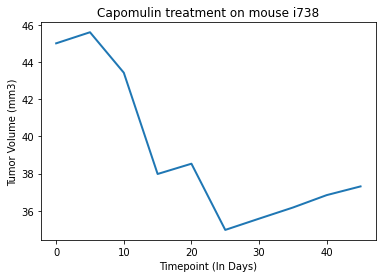

In [120]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = cleaned_df_v2.loc[cleaned_df_v2["Mouse ID"] == 'i738',:]
x_axis = line_df['Timepoint'] # define x and y axes 
y_axis = line_df['Tumor Volume (mm3)']

plt.title('Capomulin treatment on mouse i738')
plt.plot(x_axis, y_axis, linewidth=2, markersize=10)
plt.xlabel('Timepoint (In Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('lineplot')
plt.show

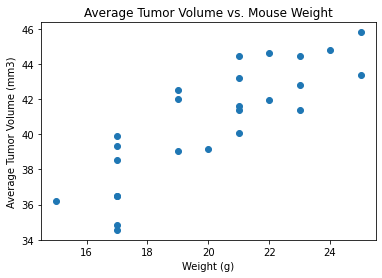

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [122]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# use .loc() to create DataFrame of drug regimen 'Capomulin' 
capo_df = cleaned_df_v2.loc[cleaned_df_v2['Drug Regimen'] == 'Capomulin',:]
# use .groupby() and .mean() to create DataFrame
capo_avg = capo_df.groupby(['Mouse ID']).mean()

# create scatter plot by calling from capo_avg DataFrame
plt.scatter(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()
capo_avg

## Correlation and Regression

In [124]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])[0],2)
print(f" The correlation between mouse weight and average tumor volume is {corr}.")

 The correlation between mouse weight and average tumor volume is 0.84.


In [125]:
regress = st.linregress(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
regress

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

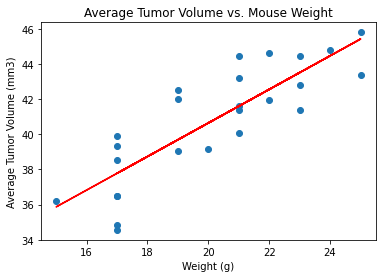

In [127]:
# define slope and y-intercept
slope=0.9544396890241048
intercept=21.552160532685008

# plot regression line
line = slope*(capo_avg['Weight (g)'])+intercept
plt.scatter(capo_avg['Weight (g)'], capo_avg['Tumor Volume (mm3)'])
plt.plot(capo_avg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('linear_regression')
plt.show()